<a href="https://colab.research.google.com/github/RelaxingCoyote/NEUROEV/blob/main/NCL_Khayrov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Нейроэволюционные вычисления

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1-EpdWG47AK3_W6bAYBrHNKM6vCYej-O3#scrollTo=MSdEKikMh9kf)

Подключаем гугл-диск.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


Устанавливаем пакет Datatable.

In [2]:
pip install datatable

Импортируем необходимые библиотеки.

In [3]:
import datatable as dt
print(dt.__version__)

0.11.1


Загружаем набор данных.

In [4]:
DT = dt.fread('/content/gdrive/MyDrive/Machine Learning/NEUROEV/cancer1.dt')
DT

    | C0                         C1    C2    C3    C4    C5    C6    C7    C8  C9  C10
--- + -----------------------  ----  ----  ----  ----  ----  ----  ----  ----  --  ---
  0 | bool_in=0                NA    NA    NA    NA    NA    NA    NA    NA    NA   NA
  1 | real_in=9                NA    NA    NA    NA    NA    NA    NA    NA    NA   NA
  2 | bool_out=2               NA    NA    NA    NA    NA    NA    NA    NA    NA   NA
  3 | real_out=0               NA    NA    NA    NA    NA    NA    NA    NA    NA   NA
  4 | training_examples=350    NA    NA    NA    NA    NA    NA    NA    NA    NA   NA
  5 | validation_examples=175  NA    NA    NA    NA    NA    NA    NA    NA    NA   NA
  6 | test_examples=174        NA    NA    NA    NA    NA    NA    NA    NA    NA   NA
  7 | 0.2                       0.1   0.1   0.1   0.2   0.1   0.2   0.1   0.1   1    0
  8 | 0.2                       0.1   0.1   0.1   0.2   0.1   0.3   0.1   0.1   1    0
  9 | 0.5                       0.1   0.1  

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪,▪
0,bool_in=0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,real_in=9,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,bool_out=2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,real_out=0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,training_examples=350,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,validation_examples=175,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,test_examples=174,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,0.2,0.1,0.1,0.1,0.2,0.1,0.2,0.1,0.1,1,0
8,0.2,0.1,0.1,0.1,0.2,0.1,0.3,0.1,0.1,1,0


Очистим набор данных от лишних столбцов.

In [5]:
del DT[0:7,:]
DT

    | C0    C1   C2   C3   C4   C5   C6   C7   C8  C9  C10
--- + ---  ---  ---  ---  ---  ---  ---  ---  ---  --  ---
  0 | 0.2  0.1  0.1  0.1  0.2  0.1  0.2  0.1  0.1   1    0
  1 | 0.2  0.1  0.1  0.1  0.2  0.1  0.3  0.1  0.1   1    0
  2 | 0.5  0.1  0.1  0.1  0.2  0.1  0.2  0.1  0.1   1    0
  3 | 0.5  0.4  0.6  0.8  0.4  0.1  0.8  1    0.1   0    1
  4 | 0.5  0.3  0.3  0.1  0.2  0.1  0.2  0.1  0.1   1    0
  5 | 0.2  0.3  0.1  0.1  0.3  0.1  0.1  0.1  0.1   1    0
  6 | 0.3  0.5  0.7  0.8  0.8  0.9  0.7  1    0.7   0    1
  7 | 1    0.5  0.6  1    0.6  1    0.7  0.7  1     0    1
  8 | 1    0.9  0.8  0.7  0.6  0.4  0.7  1    0.3   0    1
  9 | 0.4  0.1  0.1  0.1  0.2  0.1  0.3  0.1  0.1   1    0
 10 | 0.5  0.1  0.1  0.1  0.2  0.1  0.3  0.1  0.1   1    0
 11 | 0.8  1    1    0.1  0.3  0.6  0.3  0.9  0.1   0    1
 12 | 0.1  0.1  0.3  0.1  0.2  0.1  0.2  0.1  0.1   1    0
 13 | 0.1  0.1  0.1  0.2  0.1  0.1  0.1  0.1  0.1   1    0
 14 | 0.3  0.4  0.5  0.2  0.6  0.8  0.4  0.1  0.1   0   

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪,▪
0,0.2,0.1,0.1,0.1,0.2,0.1,0.2,0.1,0.1,1,0
1,0.2,0.1,0.1,0.1,0.2,0.1,0.3,0.1,0.1,1,0
2,0.5,0.1,0.1,0.1,0.2,0.1,0.2,0.1,0.1,1,0
3,0.5,0.4,0.6,0.8,0.4,0.1,0.8,1,0.1,0,1
4,0.5,0.3,0.3,0.1,0.2,0.1,0.2,0.1,0.1,1,0
5,0.2,0.3,0.1,0.1,0.3,0.1,0.1,0.1,0.1,1,0
6,0.3,0.5,0.7,0.8,0.8,0.9,0.7,1,0.7,0,1
7,1,0.5,0.6,1,0.6,1,0.7,0.7,1,0,1
8,1,0.9,0.8,0.7,0.6,0.4,0.7,1,0.3,0,1


Представим набор данных в виде DataFrame Pandas.

In [6]:
import pandas as pd
df = pd.DataFrame(DT.to_pandas())
df

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,0.2,0.1,0.1,0.1,0.2,0.1,0.2,0.1,0.1,True,False
1,0.2,0.1,0.1,0.1,0.2,0.1,0.3,0.1,0.1,True,False
2,0.5,0.1,0.1,0.1,0.2,0.1,0.2,0.1,0.1,True,False
3,0.5,0.4,0.6,0.8,0.4,0.1,0.8,1.0,0.1,False,True
4,0.5,0.3,0.3,0.1,0.2,0.1,0.2,0.1,0.1,True,False
...,...,...,...,...,...,...,...,...,...,...,...
694,0.5,0.1,0.2,0.1,0.2,0.1,0.1,0.1,0.1,True,False
695,0.7,0.5,0.6,1.0,0.5,1.0,0.7,0.9,0.4,False,True
696,0.6,1.0,1.0,1.0,0.8,1.0,0.7,1.0,0.7,False,True
697,0.5,0.7,1.0,1.0,0.5,1.0,1.0,1.0,0.1,False,True


Разобъём выборку на тестовую и тренировочную.

In [7]:
y = df[['C9','C10']]
y

,C9,C10
0,True,False
1,True,False
2,True,False
3,False,True
4,True,False
...,...,...
694,True,False
695,False,True
696,False,True
697,False,True


Предположим, что принадлежность к классу C9 исключает принадлежность к классу C10. Выведем ячейки, где C9 = C10.

In [8]:
y[y['C9']==y['C10']]

,C9,C10


Таких значений нет. Таким образом, гипотеза была верна и от одного из столбцов можно избавиться для упрощения вычислений.

In [9]:
y_monoclass = y.iloc[:,0].astype('int64')
y_monoclass.head()

0    1
1    1
2    1
3    0
4    1
Name: C9, dtype: int64

Теперь создадим датасет для входных данных классификатора.

In [10]:
X = df.iloc[:, 0:9].copy()
X

,C0,C1,C2,C3,C4,C5,C6,C7,C8
0,0.2,0.1,0.1,0.1,0.2,0.1,0.2,0.1,0.1
1,0.2,0.1,0.1,0.1,0.2,0.1,0.3,0.1,0.1
2,0.5,0.1,0.1,0.1,0.2,0.1,0.2,0.1,0.1
3,0.5,0.4,0.6,0.8,0.4,0.1,0.8,1.0,0.1
4,0.5,0.3,0.3,0.1,0.2,0.1,0.2,0.1,0.1
...,...,...,...,...,...,...,...,...,...
694,0.5,0.1,0.2,0.1,0.2,0.1,0.1,0.1,0.1
695,0.7,0.5,0.6,1.0,0.5,1.0,0.7,0.9,0.4
696,0.6,1.0,1.0,1.0,0.8,1.0,0.7,1.0,0.7
697,0.5,0.7,1.0,1.0,0.5,1.0,1.0,1.0,0.1


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C0      699 non-null    object 
 1   C1      699 non-null    float64
 2   C2      699 non-null    float64
 3   C3      699 non-null    float64
 4   C4      699 non-null    float64
 5   C5      699 non-null    float64
 6   C6      699 non-null    float64
 7   C7      699 non-null    float64
 8   C8      699 non-null    float64
dtypes: float64(8), object(1)
memory usage: 49.3+ KB


Преобразуем первый столбец (столбец с индексом 0) к числовому типу.

In [12]:
X=X.astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C0      699 non-null    float64
 1   C1      699 non-null    float64
 2   C2      699 non-null    float64
 3   C3      699 non-null    float64
 4   C4      699 non-null    float64
 5   C5      699 non-null    float64
 6   C6      699 non-null    float64
 7   C7      699 non-null    float64
 8   C8      699 non-null    float64
dtypes: float64(9)
memory usage: 49.3 KB


Разделим входные и выходные данные на тренировочную и тестовую выборки с соотношением 80/20 соответственно.

In [13]:
from sklearn.model_selection import train_test_split

y_train,y_test,X_train,X_test = train_test_split(y_monoclass,X,train_size = 0.8, random_state = 3)

Добавим сигмоидальную функцию активации.

In [14]:
import numpy as np

def sigmoid(x):
  s = np.array(x)
  s = 1/(1+np.exp(-s))
  return s

Зададим класс нейронной сети.

In [15]:
# Класс для ИНС
class NN:
  fitness = 0.0
  def __init__(self, nn_shape=None):
    # Структура сети для информации
    self.nn_shape = nn_shape
    # Нейроны
    self.neurons = []
    # Веса нейронных связей
    self.w = []
    # Смещение нейрона (bias)
    self.b = []
    if nn_shape != None:
      ## сделать throw exception, если len(nn_shape) == 1
      # инициализируем нейроны
      for layer in nn_shape:
        self.neurons.append(np.zeros(layer))
        
      # инициализируем смещения
      for i in range(1,len(nn_shape)):
        self.b.append(np.random.uniform(low=-0.2, high=0.2, size=(nn_shape[i])))
      ## Иницииализируем связи
      for i in range(1,len(nn_shape)):
        self.w.append(np.random.uniform(low=-0.5, high=0.5, size=(nn_shape[i],nn_shape[i-1])))

  def sigmoid(x):
    s = np.array(x)
    s = 1/(1+np.exp(-s))
    return s

  def forward_propagation(self,data):
    if len(data) == len(self.neurons[0]):
      self.neurons[0][:]=data[:]

      for i in range(1,len(self.neurons)):
        for j in range(len(self.neurons[i])):
          self.neurons[i][j]=sigmoid(np.dot(self.neurons[i-1],self.w[i-1][j])+self.b[i-1][j])
    return self.neurons[-1]

  # Гауссовская мутация
  def mutation(self):
    layer_num_out = np.random.randint(1,len(self.neurons))
    neur_out = np.random.randint(0,len(self.neurons[layer_num_out]))
    neur_in = np.random.randint(0,len(self.neurons[layer_num_out-1]))
    self.w[layer_num_out-1][neur_out][neur_in] += np.random.normal(loc=0,scale=2)

  def __str__(self):
    return f'NN of shape {self.nn_shape}'

  def print_weights(self):
    print(self.w)
  
  def print_bias(self):
    print(self.b)

  def print_neurons(self):
    print(self.neurons)


$BLX-{\alpha}$ кроссинговер.

In [16]:
def crossbreeding(nn_1,nn_2,alpha):
  nn_of_1 = NN(nn_shape=nn_1.nn_shape)
  nn_of_2 = NN(nn_shape=nn_2.nn_shape)

  for i in range(len(nn_1.w)):
    for j in range(len(nn_1.w[i])):
      for k in range(len(nn_1.w[i][j])):
        c_min = np.minimum(nn_1.w[i][j][k],nn_2.w[i][j][k])
        c_max = np.maximum(nn_1.w[i][j][k],nn_2.w[i][j][k])
        delat_k = c_max-c_min
        nn_of_1.w[i][j][k] = np.random.uniform(c_min-delat_k*alpha,c_max-delat_k*alpha) 
        nn_of_2.w[i][j][k] = np.random.uniform(c_min-delat_k*alpha,c_max-delat_k*alpha)

  return nn_of_1, nn_of_2

Функция для прямого распространения в ансамбле ИНС.

In [17]:
def forward_prop_ensemble(ensemble,X):
  for count in range(len(ensemble)):
      ensemble[count].forward_propagation(X)

"Голосование" ансамбля ИНС (результат вероятность).

In [18]:
def ensemble_bagging_preds(ensemble):
  F = 0
  for count in range(len(ensemble)):
    F += np.sum(ensemble[count].neurons[-1])/len(ensemble)
  return F

"Голосование" ансамбля ИНС (дискретный результат - 0 или 1).

In [19]:
def ensemble_bagging(ensemble):
  F = 0
  for count in range(len(ensemble)):
    F += np.sum(ensemble[count].neurons[-1])/len(ensemble)
  if F>0.5:
    return 1
  else:
    return 0

Функция для оценивания точности обученного классификатора на тестовой выборке.

In [20]:
def ensemble_est(ensemble,X,y):
  # размер тестового датасета
  data_set_size = y.shape[0]
  # количество правильно классифицированных случаев
  correct = 0
  for i in range(data_set_size):
    for count in range(len(ensemble)):
      population[count].forward_propagation(X.iloc[i,:].to_numpy())
    prediction = ensemble_bagging(ensemble)
    if prediction == y.iloc[i]:
      correct +=1
  accuracy = correct/data_set_size*100
  print(f'accuracy: {accuracy}%')
  return accuracy

Основной алгоритм

In [21]:
# количество циклов эволюции
evolution_cycles = 500

# структура нейронной сети
nn_structure = (9,6,6,1)

# количество нейронных сетей в популяции
M_nn = 10

# формирование начальной популяции
population = []

# Обучающая выборка
N=10

# Константа корреляции
lam = 0.4

# константа BLX-a кроссинговера
alpha = 0.5

# количество мутаций
mutations_counts = 2

model_accuracy_array = []
epochs_array = []

# инициализация начальной популяции
for count in range(M_nn):
  neural_network = NN(nn_shape=nn_structure)
  population.append(neural_network)

error_f = np.zeros(len(population))

for epoch in range(evolution_cycles):

  

  sort_indx = error_f.argsort() # индексы отсортированных элементов

  # получаем двух особей усечением (лучшая половина популяции)
  individual_1 = 0
  individual_2 = 0
  while individual_1 == individual_2:
    individual_1 = np.random.randint(0,M_nn/2)
    individual_2 = np.random.randint(0,M_nn/2)

  # Кроссинговер BLX-a. Получаем двух потомков от двух родителей
  nn_of_1,nn_of_2=crossbreeding(population[sort_indx[individual_1]],population[sort_indx[individual_2]],alpha)

# Удаляем особи с наибольшим значением функции ошибки
  if sort_indx[-1]>sort_indx[-2]:
    population.remove(population[sort_indx[-1]])
    population.remove(population[sort_indx[-2]])
  else:
    population.remove(population[sort_indx[-2]])
    population.remove(population[sort_indx[-1]])

  population.append(nn_of_1)
  population.append(nn_of_2)

  # Гауссовская мутация
  for mut_count in range(mutations_counts):
    mut = np.random.randint(0,len(population))
    population[mut].mutation()
  # Обнулим значения в массиве значений функции ошибок
  error_f[:]=0
  # Цикл обучения
  for learning_cycle in range(N):
    #выбираем случайный индекс элемент тренировочного датасета
    df_index = np.random.randint(0,X_train.shape[0])
    # входные данные
    piece_of_data = X_train.iloc[df_index,:].to_numpy()
    # желаемый отклик
    d = y_train.iloc[df_index]
    p = np.zeros_like(error_f)
    # прямое распространение для всей популяции
    forward_prop_ensemble(population,piece_of_data)

    # общий вывод популяции
    F = ensemble_bagging_preds(population)

    # расчёт функции корреляционного штрафа
    for count in range(len(population)):
      for count_p in range(len(population)):
        if count_p != count:
          p[count] += (population[count].neurons[-1]-F)*(population[count_p].neurons[-1]-F)
      error_f[count]+=1/N/2*(population[count].neurons[-1]-d)**2+1/N*lam*p[count]
  if epoch%50==0:
    epochs_array.append(epoch)
    print(f'epoch: {epoch}')
    model_accuracy_array.append(ensemble_est(population,X_test,y_test))


epoch: 0
accuracy: 34.285714285714285%
epoch: 50
accuracy: 70.0%
epoch: 100
accuracy: 95.71428571428572%
epoch: 150
accuracy: 96.42857142857143%
epoch: 200
accuracy: 95.71428571428572%
epoch: 250
accuracy: 93.57142857142857%
epoch: 300
accuracy: 91.42857142857143%
epoch: 350
accuracy: 93.57142857142857%
epoch: 400
accuracy: 94.28571428571428%
epoch: 450
accuracy: 93.57142857142857%


Далее оценим точность классификатора на тестовой выборке.

In [22]:
ensemble_est(population,X_test,y_test)

accuracy: 90.71428571428571%


90.71428571428571

График обучения

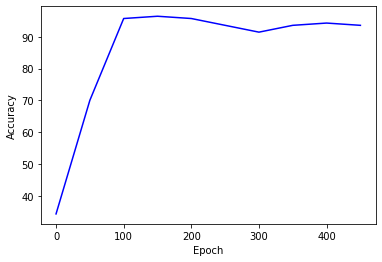

In [25]:
import matplotlib.pyplot as plt

plt.plot(epochs_array, model_accuracy_array, c='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Демонстрация вероятностного вывода.

In [24]:
df_index = np.random.randint(0,X_test.shape[0])
piece_of_data = X_test.iloc[df_index,:].to_numpy()
d = y_test.iloc[df_index]
for count in range(len(population)):
  population[count].forward_propagation(piece_of_data)
F = ensemble_bagging_preds(population)
print(d)
print(F)

1
0.6800715515811953


Функция для вывода весов связей в отдельный файл.

In [36]:
def save_weights(ensemble):
  file = open('NN_ensemble_structure.txt','w')
  for nn in range(len(ensemble)):
    file.write('\n########################\n')
    for i in range(len(ensemble[nn].w)):
      for j in range(len(ensemble[nn].w[i])):
        for k in range(len(ensemble[nn].w[i][j])):
          file.write(str(ensemble[nn].w[i][j][k])+' ')
        file.write('\n')
  file.close()


In [37]:
save_weights(population)

Функция для записи весов смещения.

In [38]:
def save_bias(ensemble):
  file = open('NN_ensemble_bias.txt','w')
  for nn in range(len(ensemble)):
    file.write('\n########################\n')
    for i in range(len(ensemble[nn].b)):
      for j in range(len(ensemble[nn].b[i])):
        file.write(str(ensemble[nn].b[i][j])+' ')
      file.write('\n')
  file.close()

In [39]:
save_bias(population)